In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Moving from Engineering to Data Science
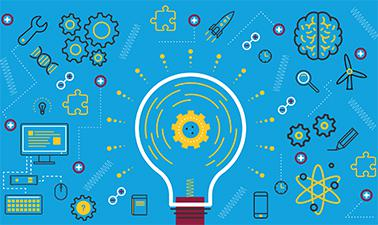
Being an engineer myself, I am interested in learning about the tools and methods used in the industry by engineers working in data centric jobs. In this notebook, I will zoom in on the responses from people around the globe who are working engineering jobs. My goal is to have the insights available from this notebook as a resource for any engineer making a career switch towards data science or alternativley, towards a more data centric engineering role.

Engineering is a broad discipline. And being an engineer can mean anything from fixing the hardware on a factory tool to creating the most sophisticated algorithm for predicting the long term effects of global warming. Putting the differences aside though, engineering in a nutshell is all about being curious, asking questions and working to find answers to those questions. And this is where Data Science and Engineering intersect. 

I invite you to take a deep dive into the key skills that may be useful for landing or acing a data centric engineering role in the industry or even better - put you on a path for making your work 'indistiguishable from magic.'


In [ ]:
!pip install seaborn --upgrade

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry 
import plotly.express as px
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')
sns.__version__

In [ ]:
df = pd.read_csv("../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv")

#colorpalette for plots
c = ['palegoldenrod','khaki','greenyellow','y','yellowgreen','mediumseagreen','darkcyan',
    'teal','steelblue','royalblue','mediumblue','navy','darkblue','midnightblue', 'midnightblue',
    'midnightblue','midnightblue','midnightblue']
c_rev = ['midnightblue','darkblue','navy','mediumblue','royalblue','steelblue','teal',
        'darkcyan','mediumseagreen','yellowgreen','y','greenyellow','khaki','palegoldenrod']

In [ ]:
df2 = df.drop(0, axis =0)
df2.iloc[0:2]
data_filtered = df2[df2['Q5'].str.contains('Engineer',na = False)]

In [ ]:
ax = plt.gca()
ax.set_facecolor('whitesmoke')
engineer_counts = (data_filtered['Q5']
                     .value_counts(normalize=True)
                     .rename('Percentage %')
                     .mul(100)
                     .reset_index().rename(columns={'index':'Engineering Role Type'}))
p=sns.barplot(y='Engineering Role Type',x = 'Percentage %',data=engineer_counts, palette = c_rev)
ax.set_facecolor('whitesmoke')
plt.title ('1a. Global Survey Participants Across Various Engineering Disciplines', fontsize =20);


In [ ]:
data_geo = data_filtered[['Q3']]
data_geo['Q3'] = data_geo['Q3'].replace('United States of America','United States')
data_geo = data_geo['Q3'].value_counts().rename_axis('country').reset_index(name = 'Participant_counts')
import pycountry 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
data_geo['CODE']=alpha3code(data_geo.country)

import plotly.express as px
dem_geo = px.choropleth(data_geo, locations="CODE",
                     color = 'Participant_counts',
                    hover_name = 'country',
                    color_continuous_scale = 'viridis' # size of markers, "pop" is one of the columns of gapminder
                     )
dem_geo.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)', landcolor='#7E7E7E'),
                                  title = '1b. Geographic Distribution of Participants from the Engineering Subgroup',
                                  font = {"size": 9, "color":"Black"},
                                  titlefont = {"size": 15, "color":"Black"},
                                  margin={"r":0,"t":40,"l":0,"b":0},
                                  )
                                  
dem_geo.show()

Figure 1a shows participants belonging to four engineering disciplines, with software engineering being the most prevalent. These responses consitute ~ 18% of the total responses (3612/20037 rows).

Figure 1b shows the geographic distribution of the individuals in this engineering subgroup. The highest number of participants is from India, followed by US participants.

I was really hoping to find a higher number of engineering disciplines represented in the data. With the emergence of big data and equipment automation, there has been debate about the prevalance of classical engineering jobs (especially in manufacturing) in the future. There is a lot of emphasis on incoming engineers - no matter which discipline - to start developing programming skills. 

Since this survey question was multiple choice, it only allowed participants to choose from pre-defined engineering disciplines and the rest probably just got lumped into the 'other' category! Sad, because it would have been nice to see the skillset of folks switching over from non-programming heavy disciplines like process, manufacturing, industrial or mechanical engineering. 

Still, I feel that there is value in visualizing the responses from this subset, as it may help narrow down the most in demand skills.

In [ ]:
y45 = data_filtered[data_filtered['Q4']=="Bachelor’s degree"]
y43= data_filtered[data_filtered['Q4']=="Master’s degree"]
y44= data_filtered[data_filtered['Q4']=="Some college/university study without earning a bachelor’s degree"]
y41= data_filtered[data_filtered['Q4']=="Doctoral degree"]
y46= data_filtered[data_filtered['Q4']=="No formal education past high school"]
y42= data_filtered[data_filtered['Q4']=="Professional degree"]

exp_l = ['20+ years','10-20 years','5-10 years','3-5 years','1-2 years',
         '< 1 years','I have never written code']
data_filtered['Q6'] = pd.Categorical(data_filtered['Q6'], exp_l)
#data_filtered[data_filtered['Q6']=='< 1 years']
#empty obj axes and fig
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))
#single title for all subplots

fig.suptitle('2. Global Engineering Participants Education and Programming Experience')
#subplots, loop next time
filt_plot41=sns.countplot( ax = axes[0,0], data=y41, y='Q4', hue = data_filtered['Q6'].sort_values(), palette = 'viridis')
filt_plot42=sns.countplot( ax = axes[0,1], data=y42, y='Q4', hue = data_filtered['Q6'].sort_values(), palette = 'viridis')
filt_plot42.get_legend().remove()
filt_plot43=sns.countplot( ax = axes[1,0], data=y43, y='Q4', hue = data_filtered['Q6'].sort_values(),palette = 'viridis')
filt_plot43.get_legend().remove()
filt_plot44=sns.countplot( ax = axes[1,1], data=y44, y='Q4', hue = data_filtered['Q6'].sort_values(), palette = 'viridis')
filt_plot44.get_legend().remove()
filt_plot45=sns.countplot( ax = axes[2,0], data=y45, y='Q4', hue = data_filtered['Q6'].sort_values(), palette = 'viridis')
filt_plot45.get_legend().remove()
filt_plot46=sns.countplot( ax = axes[2,1], data=y46, y='Q4', hue = data_filtered['Q6'].sort_values(), palette = 'viridis')
filt_plot46.get_legend().remove()

#handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center')
#plt.legend( loc = 'lower center', bbox_to_anchor = (0,-0.1,1,1),
            #bbox_transform = plt.gcf().transFigure )
#set axis labels
axes[0,0].set(xlabel = 'Response Count', ylabel = 'Education')
axes[0,1].set(xlabel = 'Response Count', ylabel = 'Education')
axes[1,0].set(xlabel = 'Response Count', ylabel = 'Education')
axes[1,1].set(xlabel = 'Response Count', ylabel = 'Education')
axes[2,0].set(xlabel = 'Response Count', ylabel = 'Education')
axes[2,1].set(xlabel = 'Response Count', ylabel = 'Education')
axes[0,0].set_facecolor('whitesmoke')
axes[0,1].set_facecolor('whitesmoke')
axes[1,0].set_facecolor('whitesmoke')
axes[1,1].set_facecolor('whitesmoke')
axes[2,0].set_facecolor('whitesmoke')
axes[2,1].set_facecolor('whitesmoke')
#set label orientation
filt_plot41.set_yticklabels(filt_plot41.get_yticklabels(),rotation=90, 
                           verticalalignment = 'center')
filt_plot42.set_yticklabels(filt_plot42.get_yticklabels(),rotation=90, 
                           verticalalignment = 'center')
filt_plot43.set_yticklabels(filt_plot43.get_yticklabels(),rotation=90, 
                           verticalalignment = 'center')
filt_plot44.set_yticklabels(['Some college'],rotation=90, 
                           verticalalignment = 'center')
filt_plot45.set_yticklabels(filt_plot45.get_yticklabels(),rotation=90, 
                           verticalalignment = 'center')
filt_plot46.set_yticklabels(['No formal degree'],rotation=90, 
                           verticalalignment = 'center')
#legend
filt_plot41.legend(loc='upper center', bbox_to_anchor=(1, 3));


Figure 2 highlights the engineer's programming experience broken down by their education level. The distributions are skewed towards higher number of years of experience for all categories except the bachelor's degree holders, whose experience level seems to have a roughly normal distribution (i.e. a good mix of more and less expereinced individuals).  


# Popular Programming Languages and Libraries

In [ ]:
# Q7 summary
response = []
rcount = []
data_filtered_Q = data_filtered.filter(regex = 'Q7')
for column in data_filtered_Q:
        # response count
        cso = data_filtered_Q[column]
        temp = cso.notna().sum()
        rcount.append(temp)
        #extract string - response option
        ft = data_filtered_Q[cso.notnull()][column]
        g= ft.astype("string")
        temp2 = g.iloc[0]
        response.append(temp2)
    
final_df = pd.DataFrame(
            {'Language':response,
             'Response count': rcount,
             'Attribute':'used regularly in industry'
            }, index = response)
final_df['Response Percentage %'] = (final_df['Response count']/final_df['Response count'].sum())*100

# Q8 summary
Q8_df = data_filtered.filter(regex = 'Q8')
Q8_df_f = Q8_df['Q8'].value_counts()
Q8_df_final = Q8_df_f.to_frame(name = 'Response count').reset_index().rename(columns={'index':'Language'})
Q8_df_final['Attribute'] = 'recommended for aspiring data scientists'
Q8_df_final['Response Percentage %'] = (Q8_df_final['Response count']/Q8_df_final['Response count'].sum())*100

#Combine Q8 and Q7 summary
gh=pd.concat([final_df,Q8_df_final])
gh['Response count'] = gh['Response count']*1.0

#create visualization
plt.figure(figsize=(12, 7))
ax = plt.gca()
ax.set_facecolor('whitesmoke')
ax.grid(linestyle=':', linewidth='0.5', color='black')
f= sns.scatterplot(data = gh, x='Language', y='Response Percentage %', hue = 'Attribute', 
                style = 'Attribute', size = 'Response count',
                sizes = (20,1000), palette = ['darkblue','brown']);

ax.legend(labelspacing = 1.2, loc='upper right', bbox_to_anchor=(1, 1),fontsize = 13)
plt.xlabel('Language', fontsize = 16)   
plt.ylabel('Response Percentage %', fontsize=16)
plt.title ('3. Popular Programming Languages Used and Recommended by Engineers Across the Globe', fontsize =20)
plt.savefig('langcomp.png', bbox_inches = 'tight');

In [ ]:
data_filtered_Q14 = data_filtered.filter(['Q14_Part_1','Q14_Part_2',
                                     'Q14_Part_3','Q14_Part_4','Q14_Part_5',
                                     'Q14_Part_6','Q14_Part_7','Q14_Part_8',
                                     'Q14_Part_9','Q14_Part_10','Q14_Part_11',
                                     'Q14_Part_Other'] )
ax = plt.gca()
ax.set_facecolor('whitesmoke')
data_filtered_Q14.stack().value_counts(normalize=True).sort_values().mul(100).plot(kind = 'barh',
                                                    color = c, figsize = (15,7))
plt.ylabel('Library', fontsize = 16)   
plt.xlabel('Response Percentage % ', fontsize=16)
plt.title ('4. Libraries Most Commonly Used by Engineers Across the Globe', fontsize =20);

In [ ]:
#data_filtered_Q38 = data_filtered.filter(regex = 'Q38')
ax = plt.gca()
ax.set_facecolor('whitesmoke')
env_counts = (data_filtered['Q38']
                     .value_counts(normalize=True)
                     .rename('Response Percentage %')
                     .mul(100)
                     .reset_index().rename(columns={'index':'Environment Name'}))
p=sns.barplot(y='Environment Name',x = 'Response Percentage %',data=env_counts, palette = c_rev)

#f.set_xticklabels(f.get_xticklabels(),rotation=90)
plt.title ('5. Popular Data Analysis Tools Used by Engineers Across the Globe', fontsize =20);

Figures 4 & 5 show that the most popular visualization/plotting libraries are matplotlib, seaborn, plotly and ggplot. And the IDEs such as jupyter notebooks and R studio are the most common tools used for analysis.

# Machine Learning

“Artificial Intelligence, deep learning, machine learning — whatever you’re doing if you don’t understand it — learn it. Because otherwise you’re going to be a dinosaur within 3 years.” ~Mark Cuban

In [ ]:
y1 = data_filtered[data_filtered['Q20']=='10,000 or more employees']
y2 = data_filtered[data_filtered['Q20']=='1000-9,999 employees']
y3 = data_filtered[data_filtered['Q20']=='250-999 employees']
y4 = data_filtered[data_filtered['Q20']=='50-249 employees']
ml_exp_l = ['We have well established ML methods (i.e., models in production for more than 2 years)',
         'We recently started using ML methods (i.e., models in production for less than 2 years)',
         'We use ML methods for generating insights (but do not put working models into production)',
         'We are exploring ML methods (and may one day put a model into production)',
         'No (we do not use ML methods)']
data_filtered['Q22'] = pd.Categorical(data_filtered['Q22'], ml_exp_l)
#empty obj axes and fig
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
#single title for all subplots
fig.suptitle('6. Prevalance of Machine Learning Across the Globe in Engineering Jobs by Company Size')
#subplots, loop next time
filt_plot1=sns.countplot( ax = axes[0,0], data=y1, y='Q20', hue = data_filtered['Q22'].sort_values(), palette = 'viridis')
filt_plot2=sns.countplot( ax = axes[0,1], data=y2, y='Q20', hue = data_filtered['Q22'].sort_values(), palette = 'viridis')
filt_plot2.get_legend().remove()
filt_plot3=sns.countplot( ax = axes[1,0], data=y3, y='Q20', hue = data_filtered['Q22'].sort_values(),palette = 'viridis')
filt_plot3.get_legend().remove()
filt_plot4=sns.countplot( ax = axes[1,1], data=y4, y='Q20', hue = data_filtered['Q22'].sort_values(), palette = 'viridis')
filt_plot4.get_legend().remove()
#set axis labels
axes[0,0].set(xlabel = 'Response Count', ylabel = 'Company Size')
axes[0,1].set(xlabel = 'Response Count', ylabel = 'Company Size')
axes[1,0].set(xlabel = 'Response Count', ylabel = 'Company Size')
axes[1,1].set(xlabel = 'Response Count', ylabel = 'Company Size')
axes[0,0].set_facecolor('whitesmoke')
axes[0,1].set_facecolor('whitesmoke')
axes[1,0].set_facecolor('whitesmoke')
axes[1,1].set_facecolor('whitesmoke')
#set label orientation
filt_plot1.set_yticklabels(filt_plot1.get_yticklabels(),rotation=90, 
                           verticalalignment = 'center')
filt_plot2.set_yticklabels(filt_plot2.get_yticklabels(),rotation=90, 
                           verticalalignment = 'center')
filt_plot3.set_yticklabels(filt_plot3.get_yticklabels(),rotation=90, 
                           verticalalignment = 'center')
filt_plot4.set_yticklabels(filt_plot4.get_yticklabels(),rotation=90, 
                           verticalalignment = 'center')
#legend
filt_plot1.legend(loc='upper center', bbox_to_anchor=(1, 2));

Figure 6 explores the relationship between the employer size and the prevalence of machine learning methods and models in these jobs. 
The distributions are mixed. Although bigger companies are skewed towards having mature ML models in production, it seems like statrups and smaller companies are also catching up with in models that have been in production for a short term.

The next few plots show the distributions of responses for the most commonly used ML frameworks, algorithms, computer vision methods, NLP methods, ML products and automated ML products for the engineer subset.

In [ ]:
data_filtered_Q16 = data_filtered.filter(regex = 'Q16')
data_filtered_Q16.stack().value_counts(normalize=True).sort_values().mul(100).plot(kind = 'barh',

                                                  color = c, figsize = (15,7))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Machine Learning Framework', fontsize = 16)   
plt.xlabel('Response Percentage %', fontsize=16)
plt.title ('7. Most Commonly Used Machine Learning Frameworks by Engineers Across the Globe', fontsize =20);

Most common machine learning libraries used in the industry include scikit learn, Tensorflow, PyTorch and Keras

In [ ]:
data_filtered_Q17 = data_filtered.filter(regex = 'Q17')
data_filtered_Q17.stack().value_counts(normalize=True).sort_values().mul(100).plot(kind = 'barh',
                                                    color = c, figsize = (15,7))

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Machine Learning Algorithms', fontsize = 16)   
plt.xlabel('Response Percentage %', fontsize=16)
plt.title ('8. Most Commonly Used Machine Learning Algorithms by Engineers Across the Globe', fontsize =20);

Most common machine learning algorithms used in the industry include linear or logistic regressions, decision tress and neural networks.

In [ ]:
data_filtered_Q28A = data_filtered.filter(regex = 'Q28_A')
data_filtered_Q28A.stack().value_counts(normalize=True).sort_values().mul(100).plot(kind = 'barh',
                                                    color = c, figsize = (15,7))

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Machine Learning Products', fontsize = 16)   
plt.xlabel('Response Percentage %', fontsize=16)
plt.title ('9. Most Commonly Used Machine Learning Products by Engineers Across the Globe', fontsize =20);

In [ ]:
data_filtered_Q34A = data_filtered.filter(regex = 'Q34_A')
data_filtered_Q34A.stack().value_counts(normalize=True).sort_values().mul(100).plot(kind = 'barh',
                                                    color = c, figsize = (15,7))

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Automated Machine Learning Tools', fontsize = 16)   
plt.xlabel('Response Percentage %', fontsize=16)
plt.title ('10. Most Commonly Used Automated Machine Learning Tools by Engineers Across the Globe', fontsize =20);

Figure 9 & 10 show that machine learning products an automated tools are not as popular or widely used in the industry yet. This may be due to a lack of trust, ethical issues, product quality or a combination of these factors.

In [ ]:
data_filtered_Q26A = data_filtered.filter(regex = 'Q26_A')
data_filtered_Q26A.stack().value_counts(normalize=True).sort_values().mul(100).plot(kind = 'barh',
                                                    color = c, figsize = (15,7))

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Cloud Computing Platforms', fontsize = 16)   
plt.xlabel('Response Percentage %', fontsize=16)
plt.title ('11. Most Commonly Used Cloud Computing Platforms by Engineers Across the Globe', fontsize =20);

Most commonly used cloud platform is AWS followed by google cloud and miscrosoft Azure. 

# Big Data and Business Intelligence tools

In [ ]:
# Q29 summary
data_filtered_Q29 = data_filtered.filter(regex = 'Q29_A')
data_filtered_Q2930 = data_filtered_Q29.stack().value_counts()
data_filtered_Q2930 = data_filtered_Q2930.to_frame(name = 'Response count').reset_index().rename(columns={'index':'Big Data Product'})
data_filtered_Q2930['Percentage'] = (data_filtered_Q2930['Response count']/data_filtered_Q2930['Response count'].sum())*100
data_filtered_Q2930['Attribute'] = '1. Used regularly'
data_filtered_Q2930 = data_filtered_Q2930[data_filtered_Q2930['Big Data Product']!='None']

#Q30 summary
data_filtered_Q30 = data_filtered['Q30'].value_counts().to_frame(name = 'Response count').reset_index().rename(columns={'index':'Big Data Product'})
data_filtered_Q30['Percentage'] = (data_filtered_Q30['Response count']/data_filtered_Q30['Response count'].sum())*100
data_filtered_Q30['Attribute'] = '2. Used regularly and most often'

#combine Q29, Q30 summaries
data_filtered_Q2930 = pd.concat([data_filtered_Q2930,data_filtered_Q30])

#plot
fig, axes = plt.subplots(figsize=(8, 6))
v = data_filtered_Q2930.pivot('Big Data Product','Attribute','Percentage')
d = sns.heatmap(v,  annot = True, cmap = 'viridis')
plt.ylabel('Big Data Products', fontsize = 16)   
plt.xlabel('Usage Attribute', fontsize=16)
plt.title ('12. Most Commonly Used Big Data Products by Engineers Across the Globe', fontsize =20);

Figure 12 shows that the most common big data product used by engineers is MySQL followed by pgSQL and these are also the most often used product. Note that this plot is showing response from two questions:
1. (What is the most common/regularly used big data tool - this reponse allowed multiple answer selection. Responders who checked multiple boxes were then asked the following question
2. Which of these (selected) products do you use most often. This question allowed only a single response selection.

Note:the 'none' option was filtered out for response to (1.) since that response did not have a (2.) counterpart. It makes sense to exclude thse for this analysis since we want to highlight only the top tools used in the industry. 


In [ ]:
data_filtered_Q31 = data_filtered.filter(regex = 'Q31_A')
data_filtered_Q3132 = data_filtered_Q31.stack().value_counts()
data_filtered_Q3132 = data_filtered_Q3132.to_frame(name = 'Response count').reset_index().rename(columns={'index':'Business Intelligence Product'})
data_filtered_Q3132['Percentage'] = (data_filtered_Q3132['Response count']/data_filtered_Q3132['Response count'].sum())*100
data_filtered_Q3132['Attribute'] = '1. Used regularly'
data_filtered_Q3132 = data_filtered_Q3132[data_filtered_Q3132['Business Intelligence Product']!='None']

data_filtered_Q32 = data_filtered['Q32'].value_counts().to_frame(name = 'Response count').reset_index().rename(columns={'index':'Business Intelligence Product'})
data_filtered_Q32['Percentage'] = (data_filtered_Q32['Response count']/data_filtered_Q32['Response count'].sum())*100
data_filtered_Q32['Attribute'] = '2. Used regularly and most often'

data_filtered_Q3132 = pd.concat([data_filtered_Q3132,data_filtered_Q32])

fig, axes = plt.subplots(figsize=(8, 6))
v = data_filtered_Q3132.pivot('Business Intelligence Product','Attribute','Percentage')
d = sns.heatmap(v,  annot = True, cmap = 'viridis')
plt.ylabel('Business Intelligence Products', fontsize = 16)   
plt.xlabel('Usage Attribute', fontsize=16)
plt.title ('13. Most commonly Used Business Intelligence Products by Engineers Across the Globe', fontsize =20);

Figure 13 is shows that the most common business intelligence product used by engineers is MS Power BI followed by Tableau and both of them show equal usage frequency. Note that this plot is showing response from two questions:
1. (What is the most common/regularly used business intelligence tool - this reponse allowed multiple answer selection. Responders who checked multiple boxes were then asked the following question
2. Which of these (selected) products do you use most often. This question allowed only a single response selection.

Note:the 'none' option was filtered out for response to (1.) since that response did not have a (2.) counterpart. It makes sense to exclude thse for this analysis since we want to highlight only the top tools used in the industry. 



That is all for now. The key takeaways from this analysis, atleast for now are:
* Master python - if you want to only master one programming language, this is 'the language'. 
* Relational database structures are widely utilized in industry, and mastery in SQL will definitely aid in navigating these structures.
* The comaprison among various company sizes and production applications of machine learning shows that although bigger companies have mature ML models that have been in production for many years now, statrups and smaller companies have recently started catching up and more and more models have been put into production in last 2 years.
* Although machine learning models are being used in production in the industry, the automated ML products still remain under utilized. This may be due to a lack of trust, ethical issues, product quality or a combination of these factors.
* MySQL and pgSQL are the most commonly used big data products by engineers
* For business intelligence tools, MS Power BI and Tableau are strong contenders for skills that one may want to add to their portfolio. 